Python code to generate the plots from the matlab experiments.

In [42]:
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
pwd

'/Users/cdickens/Desktop/high-leverage-rows/figures'

In [44]:
mat_identity = spio.loadmat('../scripts/census/regression/census_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/census/regression/census_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/census/regression/census_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/census/regression/census_uniform_sampling.mat', squeeze_me=True)

In [45]:
mat_identity

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan 29 13:42:45 2018',
 '__version__': '1.0',
 'approx_regression_time': array([  1.21016700e-03,   2.45027000e-04,   1.43098000e-04,
          1.35434000e-04,   3.41574000e-04,   1.47396390e-02,
          8.11290000e-05,   4.70200000e-05,   4.92580000e-05,
          8.68200000e-05,   7.04380000e-05,   2.02927000e-04,
          8.08230000e-05,   6.77370000e-05,   1.71373990e-02,
          1.78986680e-02,   7.47500000e-05,   5.39200000e-05,
          1.66494970e-02,   1.03206000e-04,   7.20730000e-05,
          7.01920000e-05,   6.48440000e-05,   5.35050000e-05,
          5.40890000e-05,   3.19349030e-02,   6.19050000e-05,
          5.32030000e-05,   2.69934940e-02,   5.66610000e-05,
          4.78984450e-02,   5.56810000e-05,   5.11466170e-02,
          5.22850000e-05,   2.74257660e-02,   5.63180000e-05,
          5.27820000e-05,   6.08038920e-02,   5.56810000e-05,
          5.27770000e-05,   4.

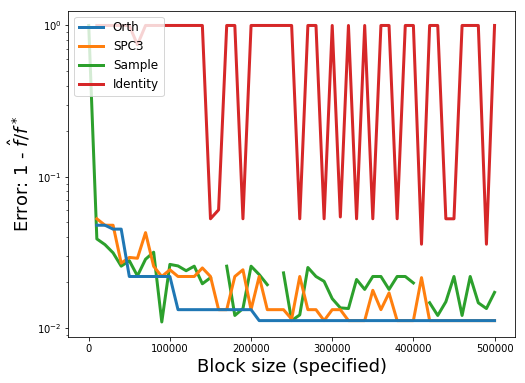

In [89]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['error'], label = 'Identity', linewidth=3.0, zorder=2)

ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error: 1 - $\hat{f}/f^*$', fontsize=18)
ax.set_xlabel('Block size (specified)', fontsize=18)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True, fontsize=12)

fig.savefig('census_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

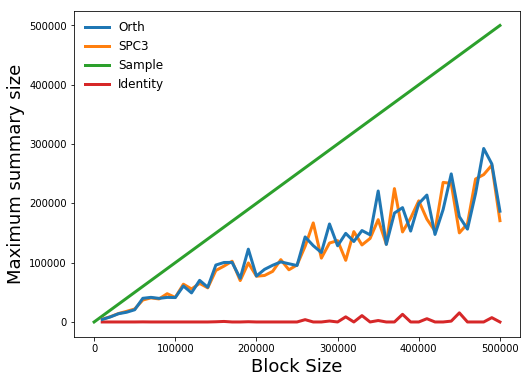

In [91]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['storage'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['storage'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Maximum summary size', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('census_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

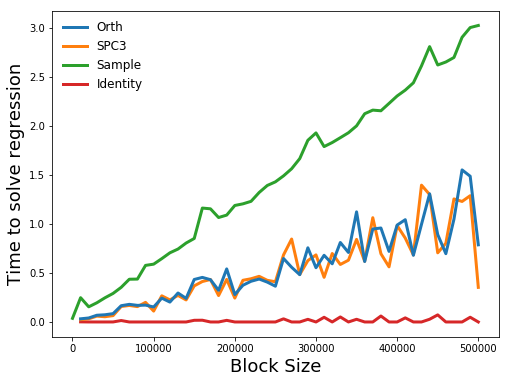

In [77]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['approx_regression_time'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time to solve regression', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('census_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

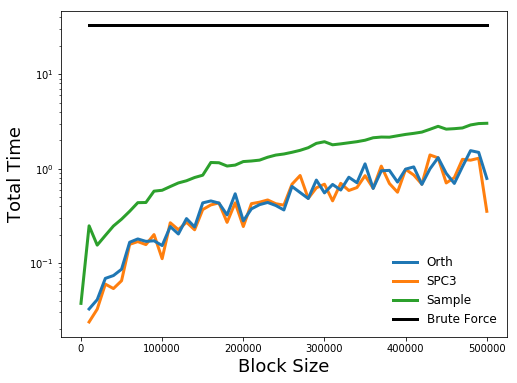

In [87]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['total_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], label = 'Identity',linewidth=3.0)
ax.plot(mat_spc3['block_sizes'], mat_spc3['full_regression_time'], color='black', label = 'Brute Force',linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=4, frameon=False, fontsize=12)

fig.savefig('census_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

In [36]:
basis_orth = spio.loadmat('../scripts/census/basis_times/census_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/census/basis_times/census_orth_basis_times.mat', squeeze_me=True)


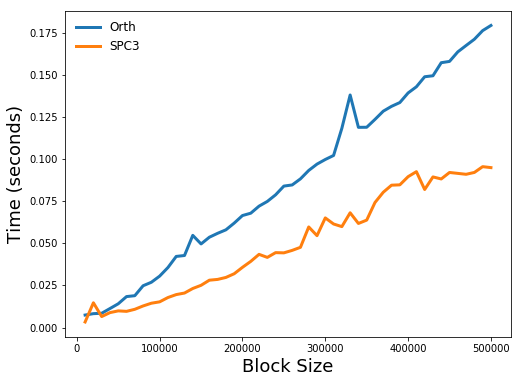

In [84]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'], label = 'Orth' , linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], label = 'SPC3', linewidth=3.0)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to compute basis  vs Block size", fontsize=18)
ax.legend(loc=0, frameon=False, fontsize=12)


fig.savefig('census_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)